#1. Assignment Description

Find a dataset for a research problem of interest, here are some good websites for this. Ideally use a dataset where you have a reasonable idea of how it was collected and can comment on the generalizability of the data.
Kaggle Data Science Competitions: http://kaggle.com

UCI Machine Learning repository: http://archive.ics.uci.edu/ml/datasets.php

Google Cloud public data: https://console.cloud.google.com/marketplace/browse?filter=solution-type:dataset&_ga=2.265202890.490000482.1586060190-1118401016.1586060190&pli=1

**Selceted dataset:** Heart Disease Cleveland UCI

https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

#2. Research Scenario Description (no more than 200 words)


---


Give relevant background information so that the reader can understand your research question. Assume that the reader does not have any specialized knowledge about your topic. Define all acronyms/abbreviations and try to avoid jargon. Make sure your research question is focused and answerable using the statistical techniques that you choose.

---



**Reasearch Topic:** *Heart Disease prediction using Statistical analysis*

**Discription:** The aim of this analysis is to provide an exploratory analysis of the Heart Disease Dataset in Cleveland, to explore primary insights, show latent relationships as well as provide visuaisations and prediction using Logistic Regression in R statistiscal software.

#3. Describe the data set (no more than 400 words)


---


 Describe each column of the dataset that are used in your analysis. Clean up your data before usage (e.g. asses and remove outliers, perform any necessary transformations/filtering, check if assumptions of your analysis are met). Remove unused columns. Describe each step of your data cleaning process and why you did this step. If possible,  provide a link to the main data set source.

---




##Dataset Discription: Heart Disease dataset

Dataset Characteristics: *Multivariate*

Subject Area: *Life Science*

Associated Tasks: *Classification*

Attribute Type: *Categorical, Integer, Real*

Instances: *303*

Attributes: *13*

---


**There are 13 attributes**


---



**age:** age in years


---


**sex:** sex (1 = male; 0 = female)


---


**cp:** chest pain type

-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic


---


trestbps: resting blood pressure (in mm Hg on admission to the hospital)


---


**chol:** serum cholestoral in mg/dl


---


**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

---

**restecg:** resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

---

**thalach:** maximum heart rate achieved

---

**exang:** exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest

---

**slope:** the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping

---

**ca:** number of major vessels (0-3) colored by flourosopy

---

**thal:** 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label

---

**condition:** 0 = no disease, 1 = disease

---
**Creators:**

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

University Hospital, Zurich, Switzerland: William Steinbr

**Source---https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci**

##Package Installation

In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("data.table"):
“installation of package ‘data.table’ had non-zero exit status”


In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”


In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("corrplot"):
“installation of package ‘corrplot’ had non-zero exit status”


In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”


In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”


In [ ]:
library(tidyverse)
library(ggplot2)
library(corrplot)
library(data.table)
library(GGally)
library(pROC)


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




## Load Dataset

In [ ]:
data <- read.csv("/content/heart_cleveland_upload.csv", stringsAsFactors = TRUE)
raw_data <- data
head(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
2,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
3,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
4,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
5,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
6,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


## Data Cleaning

In [ ]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,297,54.5420875,9.0497357,56.0,54.72803347,8.89560,29,77.0,48.0,-0.217559560,-0.54972943,0.52511892
sex,2,297,0.6767677,0.4685000,1.0,0.71966527,0.00000,0,1.0,1.0,-0.752070487,-1.43920181,0.02718513
cp,3,297,2.1582492,0.9648594,2.0,2.29288703,1.48260,0,3.0,3.0,-0.835901980,-0.44149017,0.05598682
trestbps,4,297,131.6936027,17.7628064,130.0,130.48117155,14.82600,94,200.0,106.0,0.693014179,0.75577217,1.03070257
chol,5,297,247.3501684,51.9975825,243.0,244.69874477,47.44320,126,564.0,438.0,1.106826979,4.30007077,3.01720576
fbs,6,297,0.1447811,0.3524739,0.0,0.05857741,0.00000,0,1.0,1.0,2.008788724,2.04214201,0.02045261
restecg,7,297,0.9966330,0.9949138,1.0,0.99581590,1.48260,0,2.0,2.0,0.006699597,-1.99311722,0.05773075
thalach,8,297,149.5993266,22.9415621,153.0,150.91213389,22.23900,71,202.0,131.0,-0.531132648,-0.09080465,1.33120445
exang,9,297,0.3265993,0.4697608,0.0,0.28451883,0.00000,0,1.0,1.0,0.735765216,-1.46354333,0.02725829


In [ ]:
## Check for missing Values
colSums(is.na(data))

age       sex        cp  trestbps      chol       fbs   restecg   thalach 
        0         0         0         0         0         0         0         0 
    exang   oldpeak     slope        ca      thal condition 
        0         0         0         0         0         0

Problem: Some variables have been mis-classified as `Intergers`, *Sex*, *fbs*, *condition*

In [ ]:
## Correctly convert variables to factors.
for (var in names(data)) {
  if(length(unique(data[[var]])) < 4) {
    data[[var]] <- as.factor(data[[var]])
  }
}
head(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
1,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
2,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
3,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
4,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
5,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
6,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


## Data Visualisations

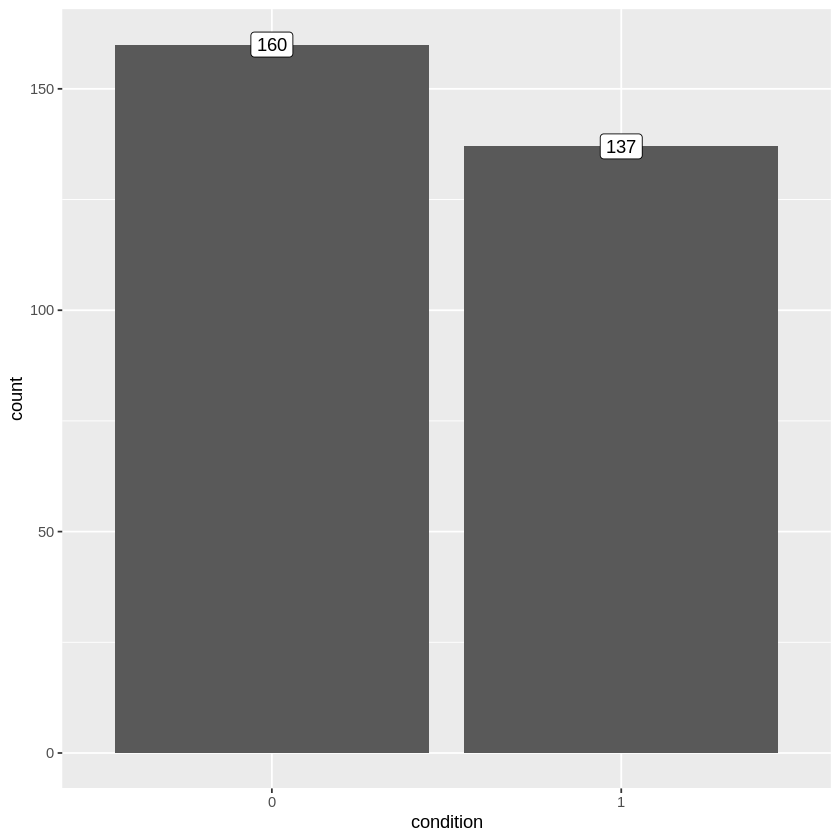

In [ ]:
## Let's take a look at the distribution for our target variable
data %>%
  ggplot(aes(condition)) +
  geom_bar() +
  geom_label(stat = "count", aes(label = after_stat(count)))

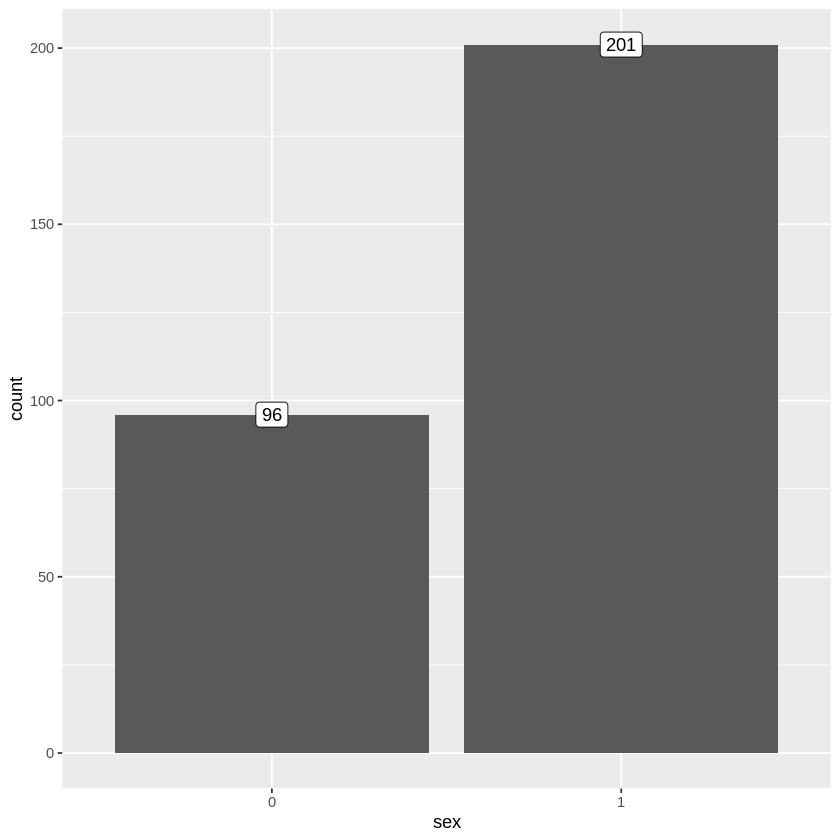

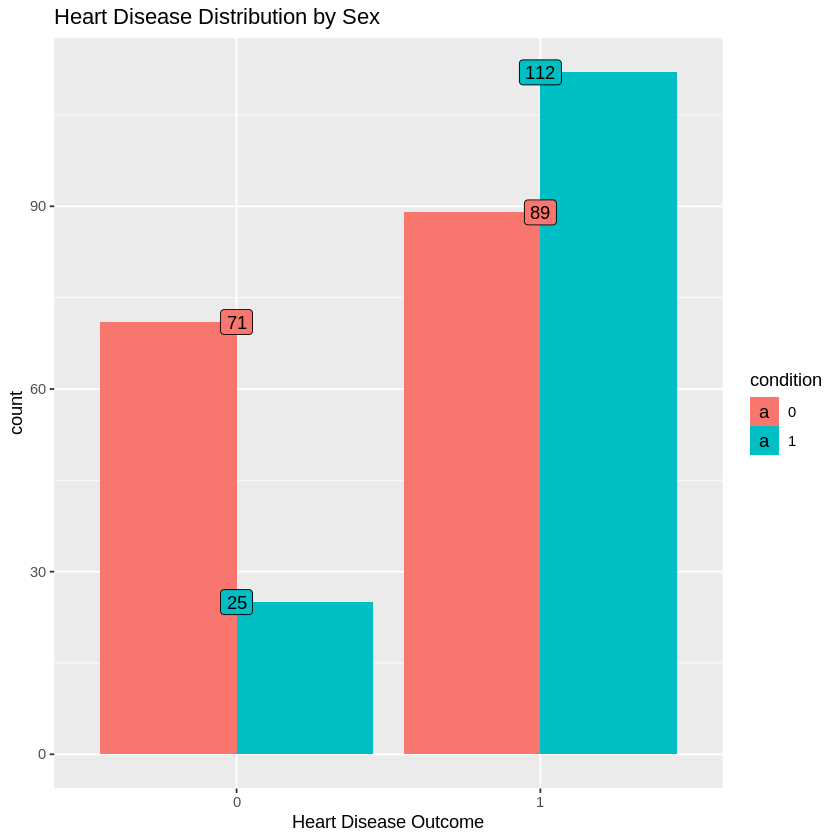

In [ ]:
## Let's take a look at the number of males and females in the data
data %>%
  ggplot(aes(sex)) +
  geom_bar() +
  geom_label(stat = "count", aes(label = after_stat(count)))

### Sex: Stacked Bar Chart

data %>%
  ggplot(aes(x = factor(sex), fill = condition)) +
  geom_bar(position = position_dodge(preserve = "single")) +
  labs(x = "Heart Disease Outcome", title = "Heart Disease Distribution by Sex") +
  geom_label(stat = "count", aes(label = ..count..))

# 1 = male
# 0 = female

Male:Memale ratio is roughly 2:1

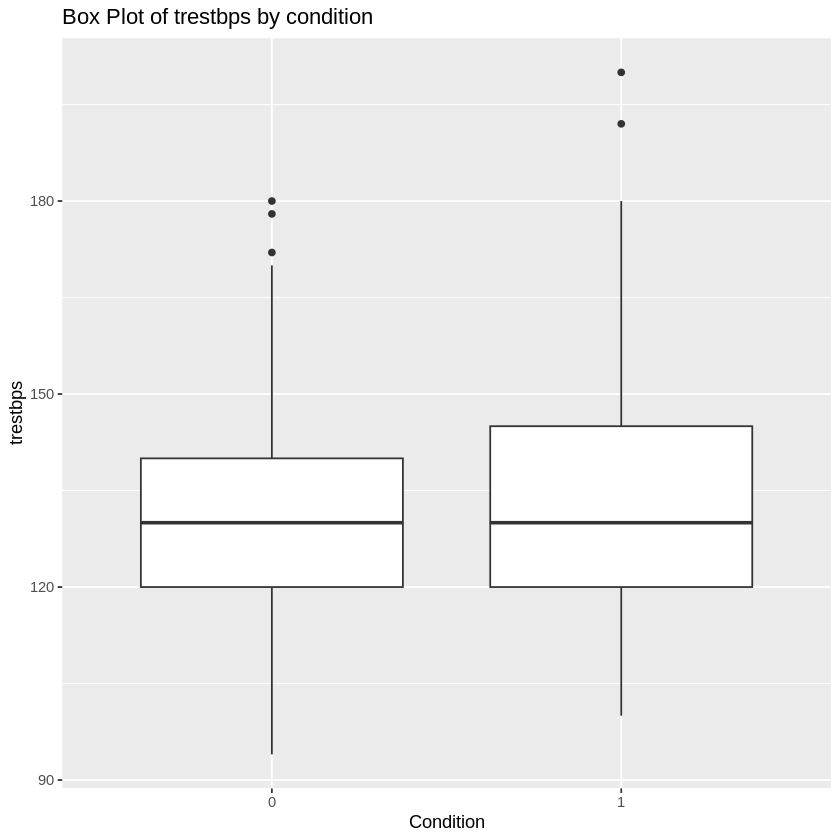

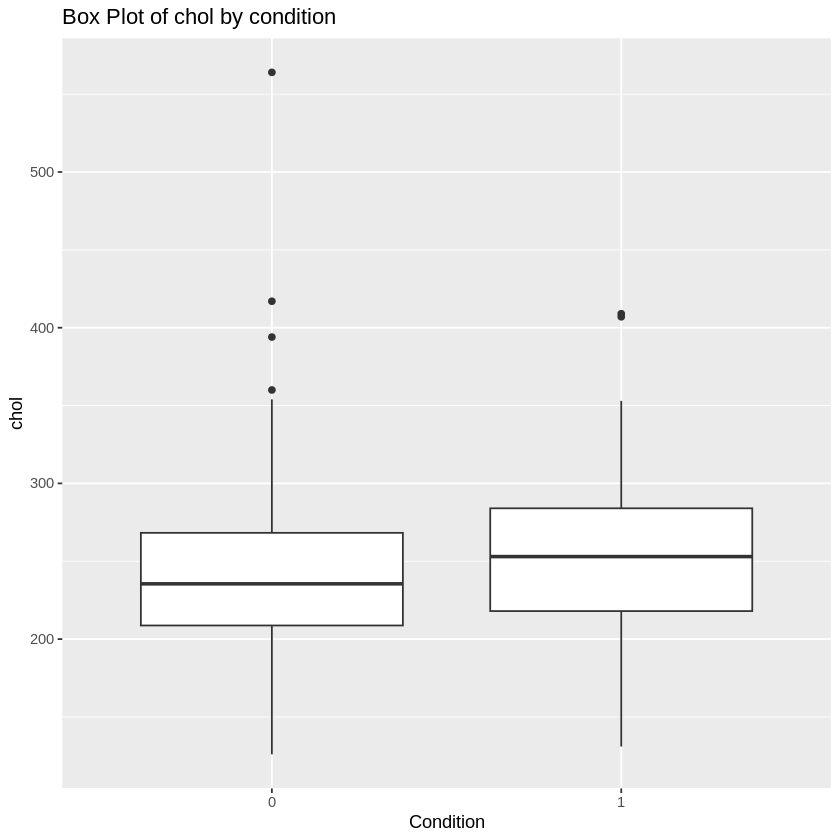

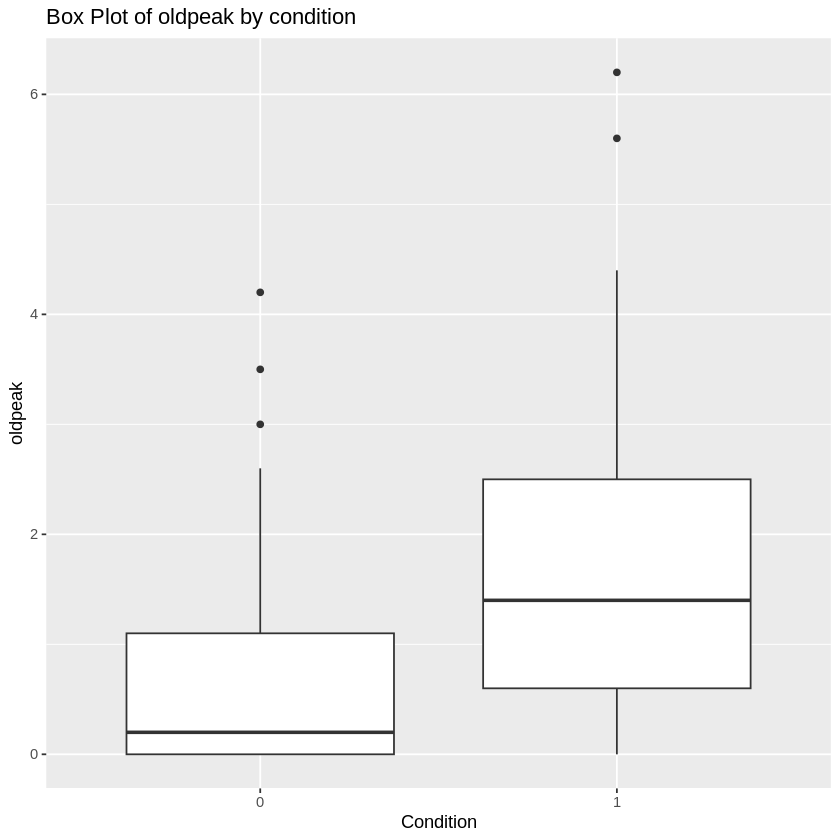

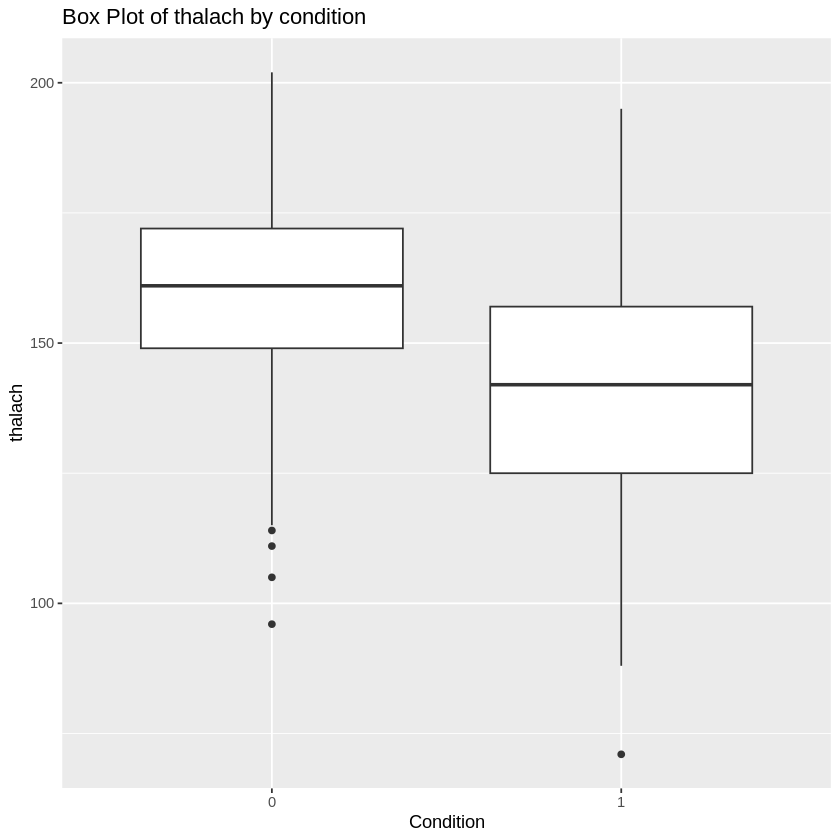

In [ ]:
ggplot(data, aes(x = condition, y = trestbps)) +
  geom_boxplot() +
  ggtitle("Box Plot of trestbps by condition") +
  xlab("Condition") +
  ylab("trestbps")

ggplot(data, aes(x = condition, y = chol)) +
  geom_boxplot() +
  ggtitle("Box Plot of chol by condition") +
  xlab("Condition") +
  ylab("chol")

ggplot(data, aes(x = condition, y = oldpeak)) +
  geom_boxplot() +
  ggtitle("Box Plot of oldpeak by condition") +
  xlab("Condition") +
  ylab("oldpeak")

ggplot(data, aes(x = condition, y = thalach)) +
  geom_boxplot() +
  ggtitle("Box Plot of thalach by condition") +
  xlab("Condition") +
  ylab("thalach")

### Numerical or Catagorical

We check variables if they are Numerical or Catagorical

In [ ]:
numericVars <- which(sapply(data, is.numeric))

factorVars <- which(sapply(data, is.factor))

cat('There are', length(numericVars), 'numeric variables, and', length(factorVars), 'categoric variables',"\n\n")
cat("\n Numerical variables are:\n")
names(numericVars)
cat("\n Catagorical variables are:\n")
names(factorVars)

There are 7 numeric variables, and 7 categoric variables 


 Numerical variables are:


[1] "age"      "cp"       "trestbps" "chol"     "thalach"  "oldpeak"  "ca"


 Catagorical variables are:


[1] "sex"       "fbs"       "restecg"   "exang"     "slope"     "thal"     
[7] "condition"

## Correlation Plot on Numerical data

,age,cp,trestbps,chol,thalach,oldpeak,ca
age,1.00,0.11,0.29,0.20,-0.39,0.20,0.36
cp,0.11,1.00,-0.04,0.07,-0.34,0.20,0.24
trestbps,0.29,-0.04,1.00,0.13,-0.05,0.19,0.10
chol,0.20,0.07,0.13,1.00,0.00,0.04,0.12
thalach,-0.39,-0.34,-0.05,0.00,1.00,-0.35,-0.27
oldpeak,0.20,0.20,0.19,0.04,-0.35,1.00,0.29
ca,0.36,0.24,0.10,0.12,-0.27,0.29,1.00


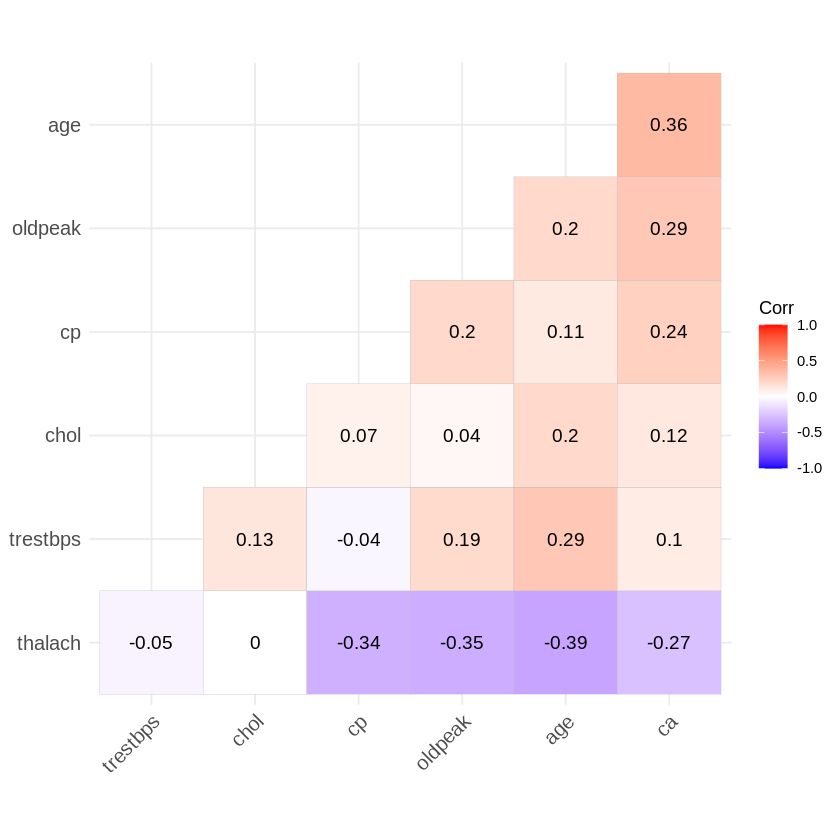

In [ ]:
# Plotting the correlation of the variables excluding Target variable

numericVars <- select_if(data, is.numeric) # select only Column-set numeric vars
corr <- cor(numericVars, use = "pairwise.complete.obs")
round(corr, 2)

## Correlation Visualisation
library(ggcorrplot)

ggcorrplot(corr,
           hc.order = TRUE, # reorders the variables, placing variables with similar correlation patterns together.
           type = "lower", lab = TRUE)

#4. Research Question (no more than 100 words)

The main research question of this analysis is to determine the feasibility of predicting heart disease in the Cleveland dataset through exploratory analysis, and utilizing Logistic Regression for predictive modeling in R statistical software.

**Splitting**
In this process a split data will be carried out between the data train and the data test for prediction.

In [ ]:
split <- sample.split(data$condition, SplitRatio = 0.8)
train <- subset(data, split == TRUE)
test <- subset(data, split == FALSE)

print("Train set")
dim(train)
print("Test set")
dim(test)

[1] "Train set"


[1] 238  14

[1] "Test set"


[1] 59 14


**Logistic Regression Model**


In [ ]:
## Fit the Logistic Regression Model

glm_heart <- glm(condition ~ age + cp + trestbps + chol + thalach + oldpeak + ca +
              sex + fbs + restecg + exang + slope + thal,
            family = binomial, data = train)

## Check
glm_heart


Call:  glm(formula = condition ~ age + cp + trestbps + chol + thalach + 
    oldpeak + ca + sex + fbs + restecg + exang + slope + thal, 
    family = binomial, data = train)

Coefficients:
(Intercept)          age           cp     trestbps         chol      thalach  
  -4.889720    -0.008390     0.577864     0.021992     0.003405    -0.020115  
    oldpeak           ca         sex1         fbs1     restecg1     restecg2  
   0.244670     1.015112     1.465562    -0.777427     0.375332     0.591765  
     exang1       slope1       slope2        thal1        thal2  
   1.085237     0.873428     0.222601     0.734117     1.099820  

Degrees of Freedom: 237 Total (i.e. Null);  221 Residual
Null Deviance:	    328.6 
Residual Deviance: 169.7 	AIC: 203.7

In [ ]:
# Make Predictions on test data
pred <- ifelse(predict(glm_heart, newdata = test, type = "response") >= 0.5, 1, 0)

In [ ]:
# Actual class
actual <- test$condition
head(actual)

[1] 0 1 0 0 0 0
Levels: 0 1

**Evaluations :**

In [ ]:

# Create a confusion matrix
table.binomial.logit <- table(actual, pred)

# Calculate accuracy
accuracy.binomial.logit <- sum(diag(table.binomial.logit)) / sum(table.binomial.logit) * 100

# Print predictions, confusion matrix, and accuracy
head(pred)
print(table.binomial.logit)
print(paste("Accuracy is", accuracy.binomial.logit))


21 36 37 40 41 54 
 0  0  0  0  0  0

      pred
actual  0  1
     0 27  5
     1  2 25
[1] "Accuracy is 88.135593220339"


In [ ]:

# Calculate sensitivity
tp <- table.binomial.logit[2, 2]
fn <- table.binomial.logit[2, 1]
sensitivity <- tp / (tp + fn)

# Print sensitivity
print(paste("Model sensitivity is", sensitivity))

# Calculate specificity
tn <- table.binomial.logit[1, 1]
fp <- table.binomial.logit[1, 2]
specificity <- tn / (tn + fp)

# Print specificity
print(paste("Model specificity is", specificity))

[1] "Model sensitivity is 0.925925925925926"
[1] "Model specificity is 0.84375"


#5. Statistical Analysis

Give at least one main visualization (with axes labeled, a relevant title, and readable fonts) that supports your conclusion. Be sure to avoid common mistakes when generating visualizations. State all assumptions of the statistical technique(s) that you are using and give evidence (if possible) or an argument as to whether these assumptions are met.

In [ ]:
values <- as.numeric(pred)
names(values) <- NULL  # Remove names if needed
table(values == test$condition)


FALSE  TRUE 
    7    52 

Setting levels: control = 0, case = 1

Setting direction: controls < cases



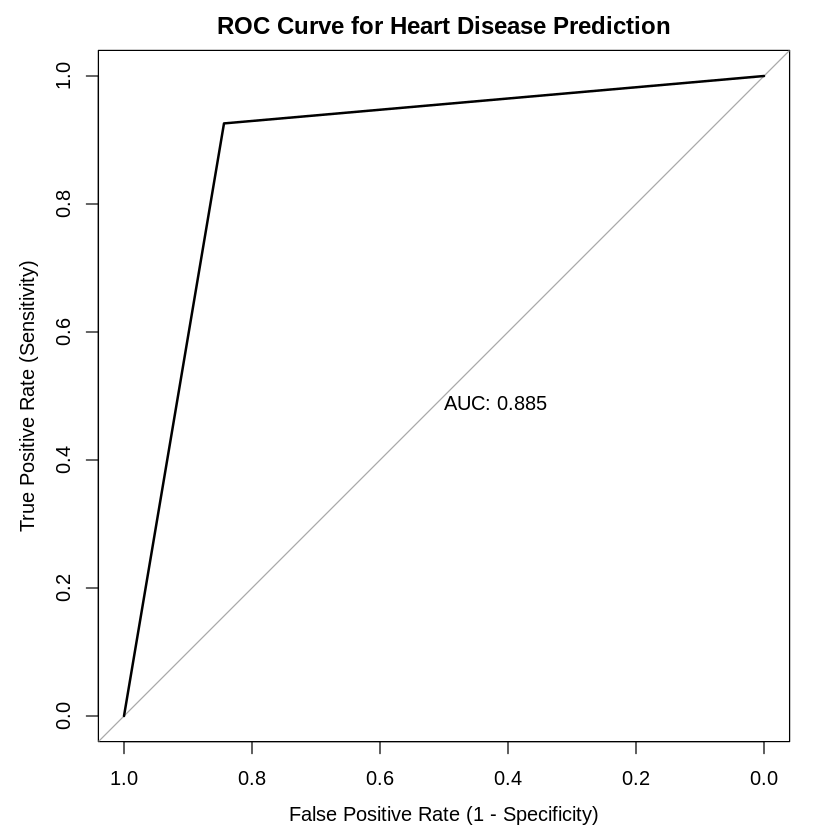

In [ ]:
# Calculate ROC curve
roc_curve <- roc(test$condition, values)

# Plot ROC curve
plot(roc_curve,
     main = "ROC Curve for Heart Disease Prediction",
     xlab = "False Positive Rate (1 - Specificity)",
     ylab = "True Positive Rate (Sensitivity)",
     print.auc = TRUE)

So, with an AUC value shown in the plot above, implies model is demonstrating good discrimination power in differentiating between the two classes (heart disease presence and absence).

**Assumptions and Evidence:**

**Assumption :**

Independence of Observations - This assumption assumes that observations are independent of each other. While we do not have specific evidence for independence, it is reasonable to assume that each patient's condition is independent of others.

**Assumption :**  Independent Variables are Linearly Associated with the Log Odds

The plot show a roughly linear pattern and the assumption holds. scatter of points around this line is fairly uniform and does not demonstrate any clear non-linear patterns (e.g., curvature), the assumption is met.






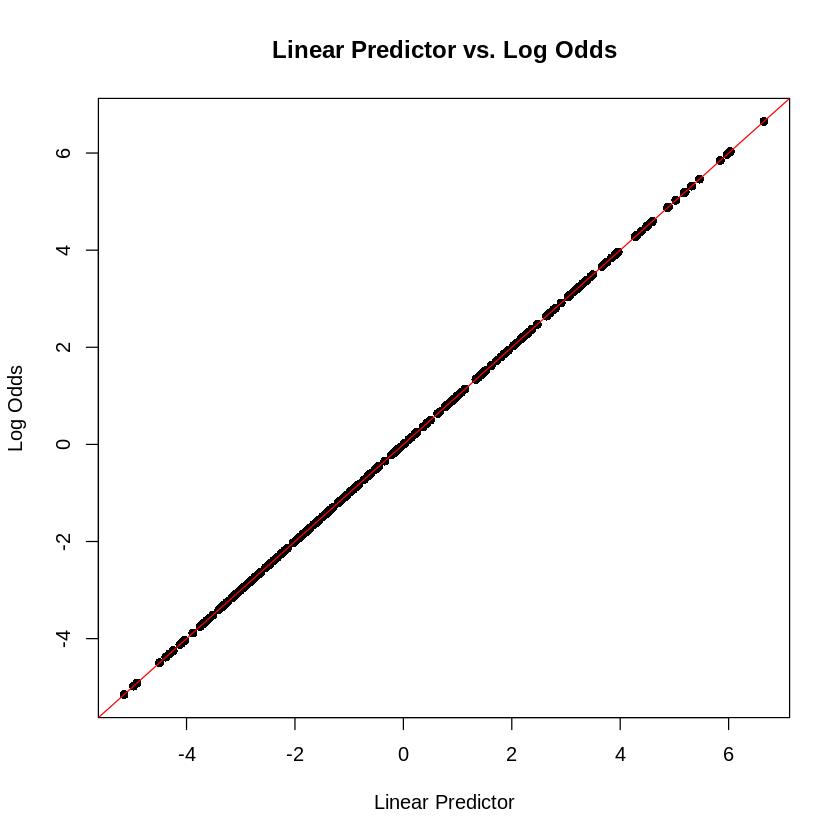

In [ ]:
# Predict the probabilities
predicted_probs <- predict(glm_heart, type = "response")

# Calculate the odds
odds <- predicted_probs / (1 - predicted_probs)

# Calculate the log odds
log_odds_pred <- log(odds)

# Now, let's plot the linear predictor values against these computed log odds
plot(linear_pred, log_odds_pred, main = "Linear Predictor vs. Log Odds",
     xlab = "Linear Predictor", ylab = "Log Odds", pch = 16)
abline(lm(log_odds_pred ~ linear_pred), col = "red")  # Linear regression line


**Assumption :** Dependent Variable is Binary

yes the Dependent Variable is Binary

**Assumption :** Little or No Multicollinearity Among Independent Variables


check multicollinearity using the Variance Inflation Factor (VIF) for each predictor.

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(car)
print(vif(glm_heart))
print("In general, VIF values less than 5 are considered to be low and suggest that multicollinearity is not a major concern.")

             GVIF Df GVIF^(1/(2*Df))
age      1.403707  1        1.184781
cp       1.220970  1        1.104975
trestbps 1.272512  1        1.128057
chol     1.223183  1        1.105976
thalach  1.458578  1        1.207716
oldpeak  1.636069  1        1.279089
ca       1.296432  1        1.138610
sex      1.546202  1        1.243464
fbs      1.185691  1        1.088894
restecg  1.227010  2        1.052476
exang    1.161055  1        1.077522
slope    2.059884  2        1.198011
thal     1.412224  2        1.090124
[1] "In general, VIF values less than 5 are considered to be low and suggest that multicollinearity is not a major concern."


**Assumption :** Enough Samples

We have enough cases with the least frequent outcome for each independent variable in the model.

Rule of thumb: At least 10 cases for each predictor level which is statisfied

In [ ]:
# Rule of thumb: At least 10 cases for each predictor level
table(data$condition, data$sex)
table(data$condition, data$fbs)
table(data$condition, data$restecg)
table(data$condition, data$exang)
table(data$condition, data$slope)
table(data$condition, data$thal)

   
      0   1
  0  71  89
  1  25 112

   
      0   1
  0 137  23
  1 117  20

   
     0  1  2
  0 92  1 67
  1 55  3 79

   
      0   1
  0 137  23
  1  63  74

   
      0   1   2
  0 103  48   9
  1  36  89  12

   
      0   1   2
  0 127   6  27
  1  37  12  88

#6. State Your Conclusion (no more than 100 words)

State the major conclusion(s) of your analysis in a way that a non-statistician can understand.

In our study of heart disease prediction using the Cleveland dataset, we employed statistical analysis with Logistic Regression in R software. The results indicated a high accuracy of 88.13% in predicting the presence or absence of heart disease. Specifically, the model could correctly identify those with the disease 92% of the time (sensitivity) and those without the disease 84% of the time (specificity). This suggests that our model can be a reliable tool for identifying individuals at risk of heart disease